# One sample test on simulated bulk RNA-seq

Nuha BinTayyash, 2020

This notebook shows how to run GPcounts with one sample test  and the resulted ROC curves on simulated bulk RNA-seq datasets.

In [1]:
import numpy as np
import pandas as pd
from GPcounts.GPcounts_Module import Fit_GPcounts
import gpflow
from helper import plot 

In [ ]:
files = [
    '../data/low_counts_low_dispersion.csv'
    ,'../data/low_counts_high_dispersion.csv'                                     
    ,'../data/high_counts_low_dispersion.csv'
    ,'../data/high_counts_high_dispersion.csv'
    ]
  
X = pd.read_csv('../data/time_points.csv',index_col=[0])

for file in files:
    print(file)
    Y = pd.read_csv(file,index_col=[0])
    likelihoods = ['Negative_binomial','Gaussian','Poisson'] 
    for likelihood in likelihoods:
        gp_counts = Fit_GPcounts(X,Y,safe_mode = True) 
        results = gp_counts.One_sample_test(likelihood)
        file = file.replace("../data/", "")
        results.to_csv("../data/ll_ratio_"+likelihood+"_"+file)
    

To do Anscombe_transformation, run /Analysis/Theory/Anscombe transformation.ipynb notebook from [SpatialDE](https://github.com/Teichlab/SpatialDE) package

In [2]:
files = [
    '../data/Anscombe_transformation_low_counts_low_dispersion.csv',
    '../data/Anscombe_transformation_low_counts_high_dispersion.csv',                                     
    '../data/Anscombe_transformation_high_counts_low_dispersion.csv',
    '../data/Anscombe_transformation_high_counts_high_dispersion.csv'
    ]
                     
X = pd.read_csv('../data/time_points.csv',index_col=[0])

for file in files:
    print(file)
    Y = pd.read_csv(file,index_col=[0])    
    
    likelihoods = ['Gaussian']
    for likelihood in likelihoods:
        gp_counts = Fit_GPcounts(X,Y,safe_mode = True) 
        results = gp_counts.One_sample_test(likelihood,transform = False)
        file = file.replace("../data/", "")
        results.to_csv("../data/ll_ratio_"+likelihood+'_'+file)
       

  0%|          | 0/600 [00:00<?, ?it/s]

../data/Anscombe_transformation_low_counts_low_dispersion.csv


  0%|          | 0/600 [00:00<?, ?it/s]

../data/Anscombe_transformation_low_counts_high_dispersion.csv


  0%|          | 0/600 [00:00<?, ?it/s]

../data/Anscombe_transformation_high_counts_low_dispersion.csv


  0%|          | 0/600 [00:00<?, ?it/s]

../data/Anscombe_transformation_high_counts_high_dispersion.csv


100%|██████████| 600/600 [04:58<00:00,  2.01it/s]


In [3]:
from matplotlib import pyplot as plt
from sklearn import metrics

\* Note in one sample tesr we set negative log likelihood ratios are to zero

### Roc curves 

low_counts_low_dispersion.csv


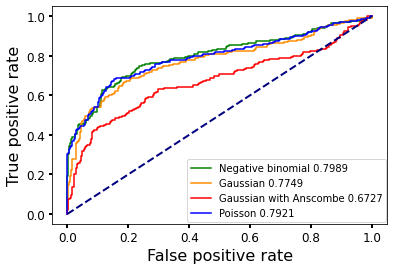

low_counts_high_dispersion.csv


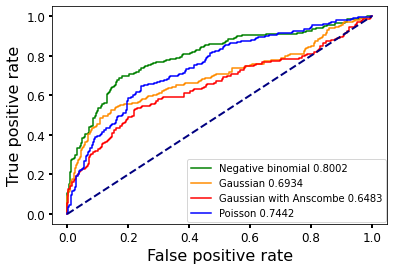

high_counts_low_dispersion.csv


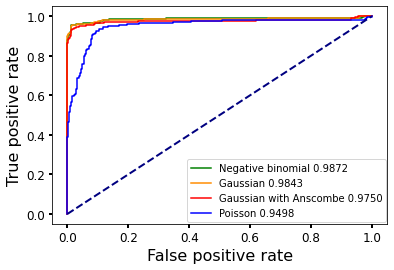

high_counts_high_dispersion.csv


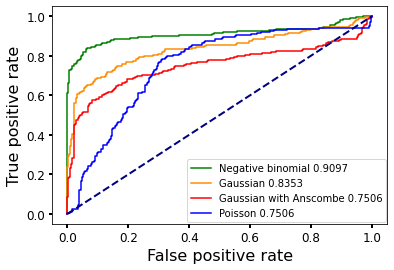

In [4]:
filesname = [
            'low_counts_low_dispersion.csv'
            ,'low_counts_high_dispersion.csv'                                     
            ,'high_counts_low_dispersion.csv'
            ,'high_counts_high_dispersion.csv'
            ]
            
for file in filesname:
    print(file)
    
    Gaussian = pd.read_csv('../data/ll_ratio_Gaussian_'+file,index_col=[0])
    Gaussian_anscombe = pd.read_csv('../data/ll_ratio_Gaussian_Anscombe_transformation_'+file,index_col=[0])
    NegativeBinomial = pd.read_csv('../data/ll_ratio_Negative_binomial_'+file,index_col=[0])
    Poisson = pd.read_csv('../data/ll_ratio_Poisson_'+file,index_col=[0])
    
    
    D = NegativeBinomial.shape[0]
    true_label = np.zeros(D)
    
    for j in range(D):
        if j %2 == 0:
            true_label[j] = 1
    
    labels = pd.DataFrame(true_label, index =NegativeBinomial.index.values, columns =['label'])
    NegativeBinomial = pd.concat([NegativeBinomial,labels],axis = 1)
    fig = plt.figure()
    
    plt.tick_params(labelsize='large', width=2)     
    fpr_NB, tpr_NB, thresholds_NB = metrics.roc_curve( NegativeBinomial['label'], NegativeBinomial['log_likelihood_ratio'])
    AUC_NB=metrics.auc(fpr_NB, tpr_NB)
    plt.plot(fpr_NB, tpr_NB,color='green',label='Negative binomial {0:.4f}'.format(AUC_NB))
    
    fpr_G, tpr_G, thresholds_G = metrics.roc_curve(NegativeBinomial['label'],Gaussian['log_likelihood_ratio'])
    AUC_G=metrics.auc(fpr_G, tpr_G)
    plt.plot(fpr_G, tpr_G, color='darkorange', label='Gaussian {0:.4f}'.format(AUC_G))
    
    fpr_G_a, tpr_G_a, thresholds_G_a = metrics.roc_curve(NegativeBinomial['label'],Gaussian_anscombe['log_likelihood_ratio'])
    AUC_G_a=metrics.auc(fpr_G_a, tpr_G_a)
    plt.plot(fpr_G_a, tpr_G_a, color='red', label='Gaussian with Anscombe {0:.4f}'.format(AUC_G_a))
    
    fpr_P, tpr_P, thresholds_P = metrics.roc_curve( NegativeBinomial['label'], Poisson['log_likelihood_ratio'])
    AUC_P=metrics.auc(fpr_P, tpr_P)
    plt.plot(fpr_P, tpr_P,color='blue',label='Poisson {0:.4f}'.format(AUC_P))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    
    plt.legend(loc='upper center', bbox_to_anchor=(.70, 0.32))
    plt.xlabel('False positive rate', fontsize=16)
    plt.ylabel('True positive rate', fontsize=16)
    plt.show()
    

In [ ]:
 # plot low_low
file = '../data/low_counts_low_dispersion.csv'
   
X = pd.read_csv('../data/time_points.csv',index_col=[0])
Y = pd.read_csv(file,index_col=[0])
#gene_1_84
gp_counts = Fit_GPcounts(X,Y) 
params = gp_counts.load_predict_models(Y.iloc[0:4,:].index.values,'One_sample_test','Negative_binomial')
plot(params,X.values,Y.iloc[0:4,:])

In [ ]:
file = '../data/low_counts_high_dispersion.csv'
  
X = pd.read_csv('../data/time_points.csv',index_col=[0])
Y = pd.read_csv(file,index_col=[0])

gp_counts = Fit_GPcounts(X,Y) 
params = gp_counts.load_predict_models(Y.iloc[0:4,:].index.values,'One_sample_test','Negative_binomial')
plot(params,X.values,Y.iloc[0:4,:])

In [ ]:
file = '../data/high_counts_low_dispersion.csv'
  
X = pd.read_csv('../data/time_points.csv',index_col=[0])
Y = pd.read_csv(file,index_col=[0])

gp_counts = Fit_GPcounts(X,Y) 
params = gp_counts.load_predict_models(Y.iloc[0:4,:].index.values,'One_sample_test','Negative_binomial')

plot(params,X.values,Y.iloc[0:4,:])

In [ ]:
file = '../data/high_counts_high_dispersion.csv'
  
X = pd.read_csv('../data/time_points.csv',index_col=[0])
Y = pd.read_csv(file,index_col=[0])

gp_counts = Fit_GPcounts(X,Y) 
params = gp_counts.load_predict_models(Y.iloc[0:4,:].index.values,'One_sample_test','Negative_binomial')

plot(params,X.values,Y.iloc[0:4,:])